### ANALISIS INICIAL DEL DATASET

Carga de datos e imports de librerias

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'datasets/dataset_unificado_mercadona.csv'  
dataset = pd.read_csv(file_path)

Reviso datos faltantes

In [2]:
print("Valores nulos por columna:")
print(dataset.isnull().sum())

Valores nulos por columna:
id                 0
supermarket        0
category           0
name               0
price              0
reference_price    0
reference_unit     0
insert_date        0
PIBFecha           0
dtype: int64


Revisamos si existen valores negativos en 'price'

In [13]:
negative_prices = dataset[dataset['price'] < 0]

print(f"Cantidad de valores negativos en 'price': {len(negative_prices)}")


Cantidad de valores negativos en 'price': 0


Convertimos 'insert_date' al tipo datetime para para poder analizarlas y trabajar con ellas correctamente.

In [4]:
dataset['insert_date'] = pd.to_datetime(dataset['insert_date'])
print(f"Tipo de dato de 'insert_date': {dataset['insert_date'].dtype}")


Tipo de dato de 'insert_date': datetime64[ns]


Vemos estadísticas descriptivas de las columnas numéricas, esto da una idea general de los valores mínimos, máximos, medios y posibles outliers.

In [4]:
print("\nEstadísticas descriptivas:")
print(dataset[['price', 'reference_price', 'PIBFecha']].describe())


Estadísticas descriptivas:
               price  reference_price      PIBFecha
count  761102.000000    761102.000000  7.611020e+05
mean        6.265762         6.946805  2.876320e+02
std        67.922137        12.292162  3.979042e-13
min         0.100000         0.010000  2.876320e+02
25%         1.210000         1.630000  2.876320e+02
50%         1.980000         3.980000  2.876320e+02
75%         3.740000         8.000000  2.876320e+02
max      2470.050000       432.430000  2.876320e+02


Visualizamos la distribución de 'price<<100'a traves de histogramas para identificar tendencias generales y posibles valores atípicos.

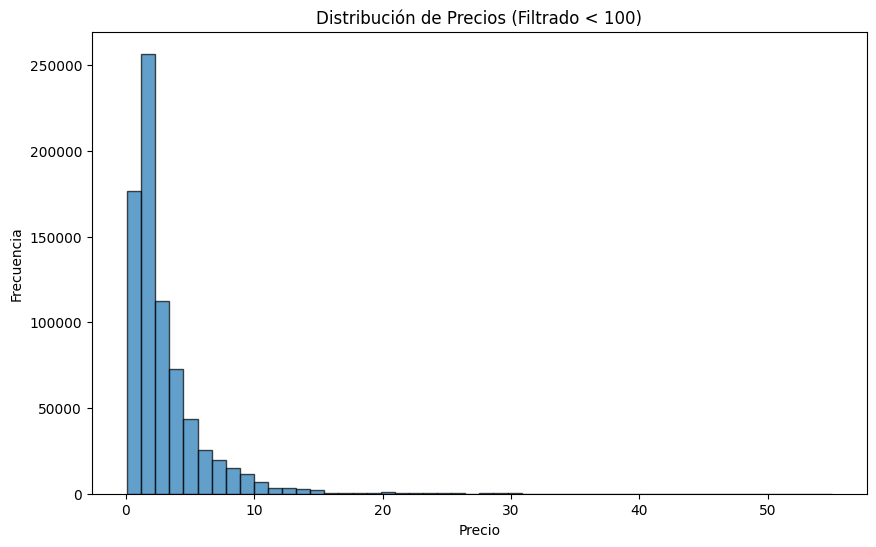

In [14]:
filtered_prices = dataset[dataset['price'] < 100]

# Histograma con el rango filtrado
plt.figure(figsize=(10, 6))
plt.hist(filtered_prices['price'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribución de Precios (Filtrado < 100)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

Visualizamos la distribución de 'reference_price<100'


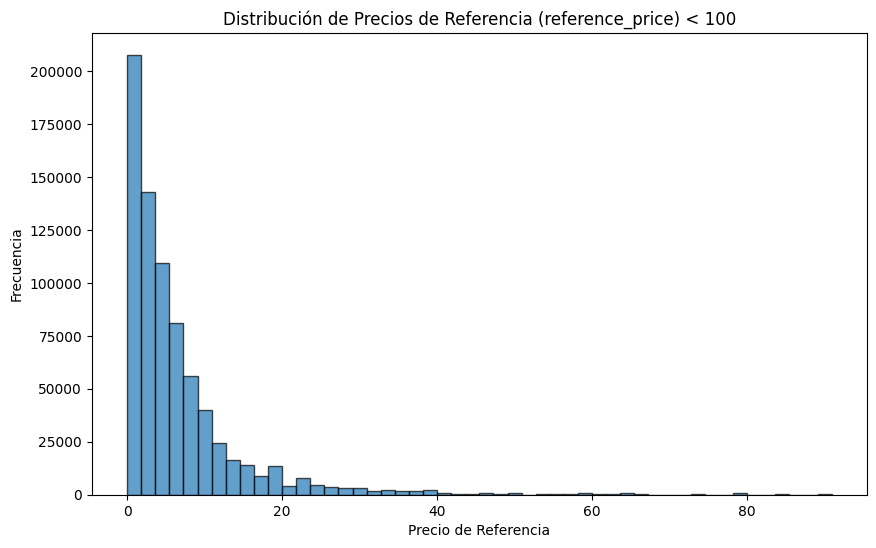

In [10]:
filtered_reference_price = dataset[dataset['reference_price'] < 100]


plt.figure(figsize=(10, 6))
plt.hist(filtered_reference_price['reference_price'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribución de Precios de Referencia (reference_price) < 100')
plt.xlabel('Precio de Referencia')
plt.ylabel('Frecuencia')
plt.show()

Revisamos las categorías únicas de 'category' y 'reference_unit'


In [12]:
print("\nCategorías únicas en 'category':")
print(dataset['category'].unique())

print("\nUnidades únicas en 'reference_unit':")
print(dataset['reference_unit'].unique())


Categorías únicas en 'category':
['fruta' 'lechuga_y_ensalada_preparada' 'verdura' 'pescado_fresco'
 'marisco' 'pescado_en_bandeja' 'pescado_congelado' 'salazones_y_ahumados'
 'cerdo' 'aves_y_pollo' 'vacuno' 'conejo_y_cordero' 'embutido'
 'hamburguesas_y_picadas' 'empanados_y_elaborados' 'golosinas' 'arreglos'
 'carne_congelada' 'aves_y_jamon_cocido' 'chopped_y_mortadela'
 'jamon_serrano' 'embutido_curado' 'bacon_y_salchichas'
 'queso_untable_y_fresco' 'queso_curado_semicurado_y_tierno'
 'queso_lonchas_rallado_y_en_porciones' 'especias' 'pate_y_sobrasada'
 'pan_de_horno' 'pan_de_molde_y_otras_especialidades'
 'pan_tostado_y_rallado' 'picos_rosquilletas_y_picatostes'
 'bolleria_de_horno' 'bolleria_envasada' 'tartas_y_pasteles'
 'harina_y_preparado_reposteria' 'velas_y_decoracion'
 'leche_y_bebidas_vegetales' 'mantequilla_y_margarina' 'huevos' 'cereales'
 'tortitas' 'galletas' 'cafe_capsula_y_monodosis' 'cafe_molido_y_en_grano'
 'cafe_soluble_y_otras_bebidas' 'cacao_soluble_y_chocolate_

Los valores únicos incluyen kg, ud, 100 g, L, entre otros. Esto será útil para estandarizar las unidades si es necesario.

Ahora vamos a detectar Outliers, para ello utilizamos el metodo del rango intercuartil (IQR)
El IQR (Interquartile Range) mide el rango entre el primer cuartil (Q1, 25%) y el tercer cuartil (Q3, 75%). Los valores considerados outliers son aquellos que están fuera del rango

Calculamos el IQR para la columna 'price'

In [15]:
Q1 = dataset['price'].quantile(0.25)  # Primer cuartil
Q3 = dataset['price'].quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1  # Rango intercuartil

Definimos los limites inferior y superior para no considerar outliers

In [17]:
lower_bound = Q1 - 1.5 * IQR
if (lower_bound < 0) :
    lower_bound = 0
upper_bound = Q3 + 1.5 * IQR

print(f"Rango intercuartil (IQR): {IQR}")
print(f"Límite inferior: {lower_bound}")
print(f"Límite superior: {upper_bound}")

Rango intercuartil (IQR): 2.5300000000000002
Límite inferior: 0
Límite superior: 7.535


Filtramos el dataset eliminando los outliers

In [18]:
filtered_dataset = dataset[(dataset['price'] >= lower_bound) & (dataset['price'] <= upper_bound)]

print(f"Registros originales: {len(dataset)}")
print(f"Registros sin outliers: {len(filtered_dataset)}")

Registros originales: 761102
Registros sin outliers: 705543


Visualizamos la nueva distribución de precios sin outliers


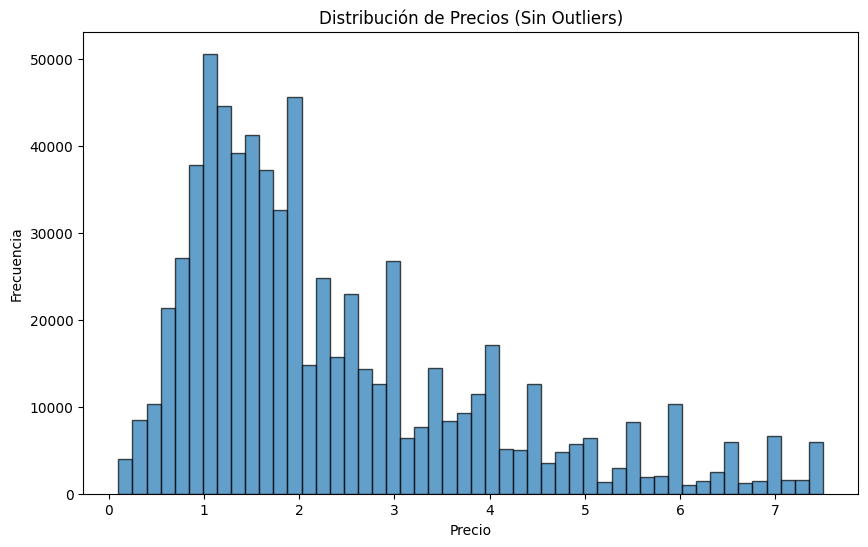

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_dataset['price'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribución de Precios (Sin Outliers)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

Ahora vamos a analizar las categorias 

In [25]:
print(f"Cantidad de categorías únicas: {dataset['category'].nunique()}")
print("\nEjemplos de categorías únicas:")
print(dataset['category'].unique()) 

Cantidad de categorías únicas: 150

Ejemplos de categorías únicas:
['fruta' 'lechuga_y_ensalada_preparada' 'verdura' 'pescado_fresco'
 'marisco' 'pescado_en_bandeja' 'pescado_congelado' 'salazones_y_ahumados'
 'cerdo' 'aves_y_pollo' 'vacuno' 'conejo_y_cordero' 'embutido'
 'hamburguesas_y_picadas' 'empanados_y_elaborados' 'golosinas' 'arreglos'
 'carne_congelada' 'aves_y_jamon_cocido' 'chopped_y_mortadela'
 'jamon_serrano' 'embutido_curado' 'bacon_y_salchichas'
 'queso_untable_y_fresco' 'queso_curado_semicurado_y_tierno'
 'queso_lonchas_rallado_y_en_porciones' 'especias' 'pate_y_sobrasada'
 'pan_de_horno' 'pan_de_molde_y_otras_especialidades'
 'pan_tostado_y_rallado' 'picos_rosquilletas_y_picatostes'
 'bolleria_de_horno' 'bolleria_envasada' 'tartas_y_pasteles'
 'harina_y_preparado_reposteria' 'velas_y_decoracion'
 'leche_y_bebidas_vegetales' 'mantequilla_y_margarina' 'huevos' 'cereales'
 'tortitas' 'galletas' 'cafe_capsula_y_monodosis' 'cafe_molido_y_en_grano'
 'cafe_soluble_y_otras_beb

Calculamos estadísticas agregadas por categoría


In [26]:
category_stats = dataset.groupby('category')[['price', 'reference_price']].agg(['mean', 'median', 'std', 'count'])
category_stats.columns = ['_'.join(col) for col in category_stats.columns]  # Renombrar columnas para mayor claridad
category_stats = category_stats.sort_values(by='price_mean', ascending=False)  # Ordenar por precio promedio

Mostramos las 10 categorías con mayor precio promedio


In [27]:
print("\nEstadísticas agregadas por categoría (top 10):")
print(category_stats.head(10))


Estadísticas agregadas por categoría (top 10):
                     price_mean  price_median   price_std  price_count  \
category                                                                 
marisco              214.145644          4.50  532.584733        10226   
jamon_serrano         42.578710          3.50   98.925591         3689   
pescado_fresco        34.113969          7.27  125.167222         5659   
perfume_y_colonia      8.796035          8.00    5.017236        22601   
licores                8.358951          7.40    4.392893        11529   
vacuno                 7.910406          6.04    7.258151         2390   
tartas_y_churros       7.641490          7.50    2.479344         4189   
tartas_y_pasteles      7.541272          7.50    2.560125         4239   
conejo_y_cordero       7.416154          7.74    2.978715         1547   
toallitas_y_panales    6.804990          5.20    5.803345         4122   

                     reference_price_mean  reference_price_medi

Visualizamos los precios promedio por categoría (solo las top 10 más caras)


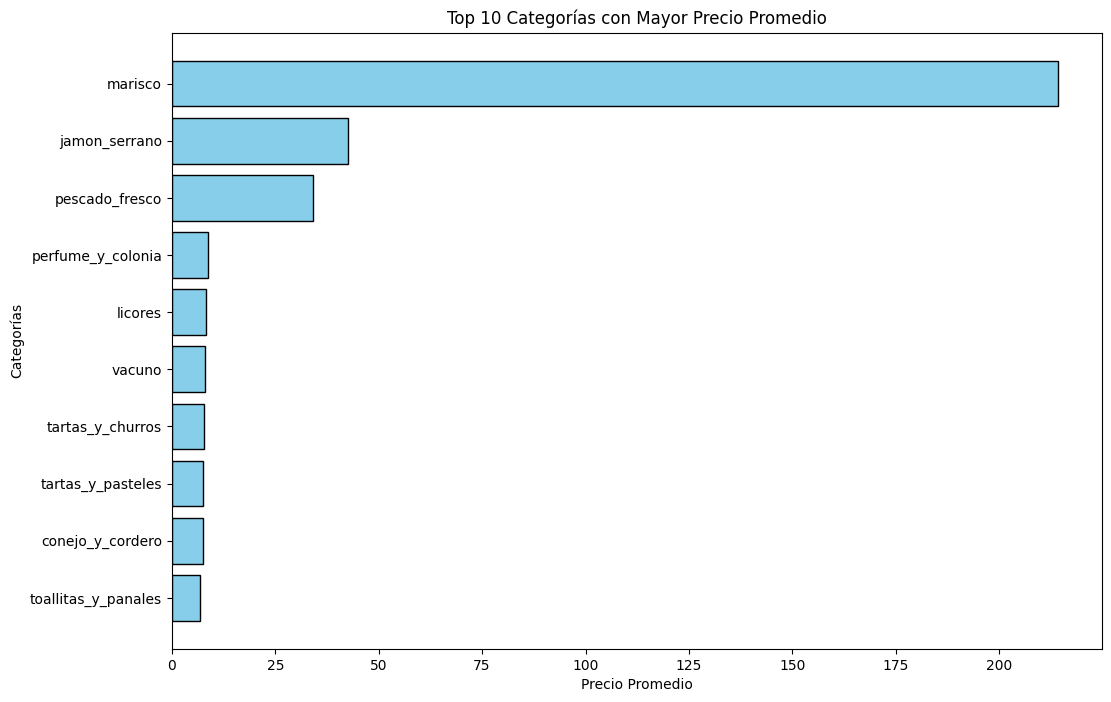

In [28]:
top_categories = category_stats.head(10)

plt.figure(figsize=(12, 8))
plt.barh(top_categories.index, top_categories['price_mean'], color='skyblue', edgecolor='k')
plt.title('Top 10 Categorías con Mayor Precio Promedio')
plt.xlabel('Precio Promedio')
plt.ylabel('Categorías')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar las categorías más caras arriba
plt.show()

Ahora vamos a analizar la relaccion entre precios y unidades de medida

In [29]:
print(f"Unidades de medida únicas: {dataset['reference_unit'].nunique()}")
print("\nEjemplos de unidades:")
print(dataset['reference_unit'].unique())

Unidades de medida únicas: 8

Ejemplos de unidades:
['kg' 'ud' '100 g' 'L' 'dc' '100 ml' 'lv' 'm']


In [30]:
unit_stats = dataset.groupby('reference_unit')[['price', 'reference_price']].agg(['mean', 'median', 'std', 'count'])
unit_stats.columns = ['_'.join(col) for col in unit_stats.columns]  # Renombrar columnas
unit_stats = unit_stats.sort_values(by='price_mean', ascending=False)  # Ordenar por precio promedio

print("\nEstadísticas por unidad de referencia:")
print(unit_stats)


Estadísticas por unidad de referencia:
                price_mean  price_median  price_std  price_count  \
reference_unit                                                     
kg                9.178604         1.750  96.426769       376548   
lv                4.431558         3.990   1.781498         4321   
100 ml            4.098060         2.990   3.115062        89550   
ud                3.891505         2.950   3.486675       123283   
L                 2.745485         1.790   2.825441       144167   
100 g             2.237288         1.300   1.740019        21829   
m                 1.650000         1.375   0.753301          468   
dc                1.490000         1.285   0.487215          936   

                reference_price_mean  reference_price_median  \
reference_unit                                                 
kg                          8.488399                   6.040   
lv                          0.132326                   0.120   
100 ml                 

Visualizamos el precio promedio por unidad de referencia

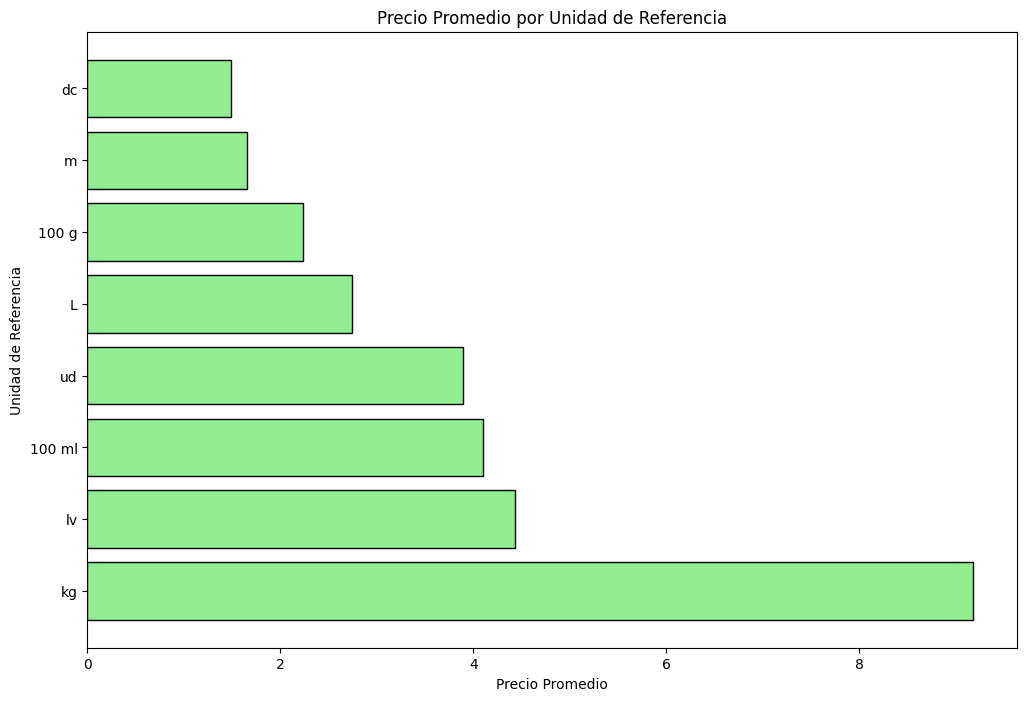

In [31]:
plt.figure(figsize=(12, 8))
plt.barh(unit_stats.index, unit_stats['price_mean'], color='lightgreen', edgecolor='k')
plt.title('Precio Promedio por Unidad de Referencia')
plt.xlabel('Precio Promedio')
plt.ylabel('Unidad de Referencia')
plt.show()

Ahora vamos a analizar la distribucion temporal de la media del precio de los productos en el tiempo
Agregaremos una columna de año-mes para agrupar los datos temporalmente y calculamos el precio promedio por mes

In [5]:
dataset['year_month'] = dataset['insert_date'].dt.to_period('M')

temporal_stats = dataset.groupby('year_month')['price'].mean()


Visualizamos el precio promedio por mes

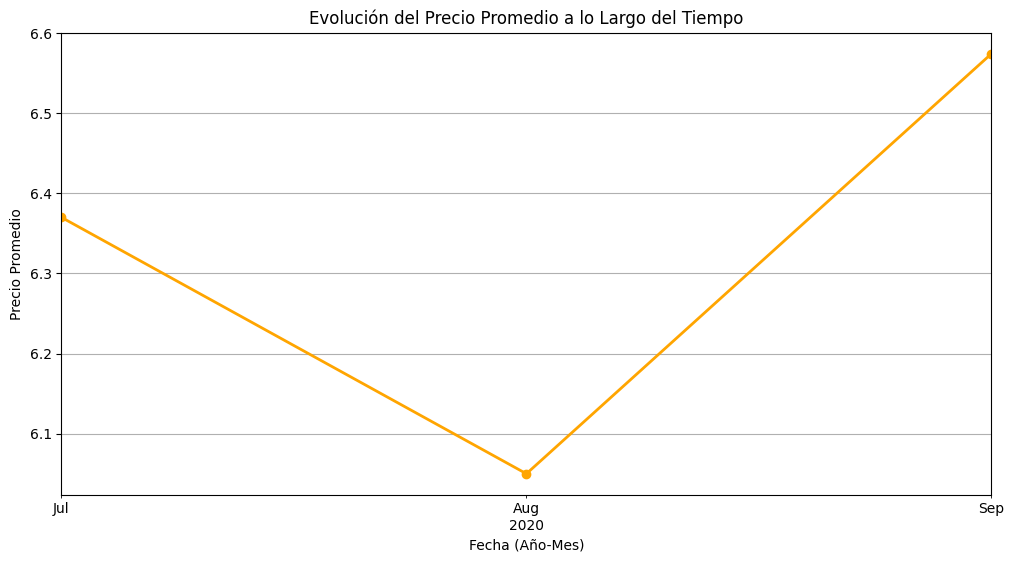

In [6]:
plt.figure(figsize=(12, 6))
temporal_stats.plot(kind='line', marker='o', color='orange', linewidth=2)
plt.title('Evolución del Precio Promedio a lo Largo del Tiempo')
plt.xlabel('Fecha (Año-Mes)')
plt.ylabel('Precio Promedio')
plt.grid(True)
plt.show()

## Preprocesado de datos

Normalizamos los precios

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalización (valores entre 0 y 1)
scaler = MinMaxScaler()
dataset[['price_normalized', 'reference_price_normalized']] = scaler.fit_transform(dataset[['price', 'reference_price']])

# Estandarización (media 0, desviación estándar 1)
std_scaler = StandardScaler()
dataset[['price_standardized', 'reference_price_standardized']] = std_scaler.fit_transform(dataset[['price', 'reference_price']])

print("Precios normalizados y estandarizados agregados al dataset.")

Precios normalizados y estandarizados agregados al dataset.


Codificamos las variables categoricas

In [ ]:
# Codificamos la columna 'category' usando One-Hot Encoding
category_encoded = pd.get_dummies(dataset['category'], prefix='category')

# Codificamos la columna 'reference_unit' usando One-Hot Encoding
unit_encoded = pd.get_dummies(dataset['reference_unit'], prefix='unit')

# Combinamos las nuevas columnas codificadas con el dataset original
dataset_encoded = pd.concat([dataset, category_encoded, unit_encoded], axis=1)

print("Categorías y unidades codificadas.")
print(f"Nuevo tamaño del dataset: {dataset_encoded.shape}")

Categorías y unidades codificadas.
Nuevo tamaño del dataset: (761102, 172)


Filtramos las columnas relevantes para un analisis posterior

In [13]:
columns_to_keep = [
    'price_normalized', 'reference_price_normalized',
    'category', 'reference_unit', 'insert_date', 'PIBFecha'
] + list(category_encoded.columns) + list(unit_encoded.columns)

final_dataset = dataset_encoded[columns_to_keep]

print(final_dataset.head())


   price_normalized  reference_price_normalized category reference_unit  \
0          0.000065                    0.002960    fruta             kg   
1          0.000097                    0.004579    fruta             kg   
2          0.000194                    0.004486    fruta             kg   
3          0.001109                    0.008742    fruta             kg   
4          0.001170                    0.009204    fruta             kg   

          insert_date  PIBFecha  category_aceite_vinagre_y_sal  \
0 2020-07-21 16:06:00   287.632                          False   
1 2020-07-21 16:06:00   287.632                          False   
2 2020-07-21 16:06:00   287.632                          False   
3 2020-07-21 16:06:00   287.632                          False   
4 2020-07-21 16:06:00   287.632                          False   

   category_aceitunas_y_encurtidos  category_acondicionador_y_mascarilla  \
0                            False                                 False   


Ahora validaremos el dataset para ver si esta la informacion correctamente procesada

In [ ]:
print("Primeras filas del dataset procesado:")
print(dataset.head())

print("\nRevisión de nulos en las columnas nuevas:")
print(dataset[['price_normalized', 'reference_price_normalized']].isnull().sum())

print("\nEstadísticas descriptivas de las columnas normalizadas:")
print(dataset[['price_normalized', 'reference_price_normalized']].describe())

Primeras filas del dataset procesado:
       id   supermarket category                     name  price  \
0  248789  mercadona-es    fruta                   Banana   0.26   
1  248790  mercadona-es    fruta                 PlÃ¡tano   0.34   
2  248791  mercadona-es    fruta           PlÃ¡tano macho   0.58   
3  248792  mercadona-es    fruta  Uva blanca sin semillas   2.84   
4  248793  mercadona-es    fruta   Uva negra sin semillas   2.99   

   reference_price reference_unit         insert_date  PIBFecha year_month  \
0             1.29             kg 2020-07-21 16:06:00   287.632    2020-07   
1             1.99             kg 2020-07-21 16:06:00   287.632    2020-07   
2             1.95             kg 2020-07-21 16:06:00   287.632    2020-07   
3             3.79             kg 2020-07-21 16:06:00   287.632    2020-07   
4             3.99             kg 2020-07-21 16:06:00   287.632    2020-07   

   price_normalized  reference_price_normalized  price_standardized  \
0          0.

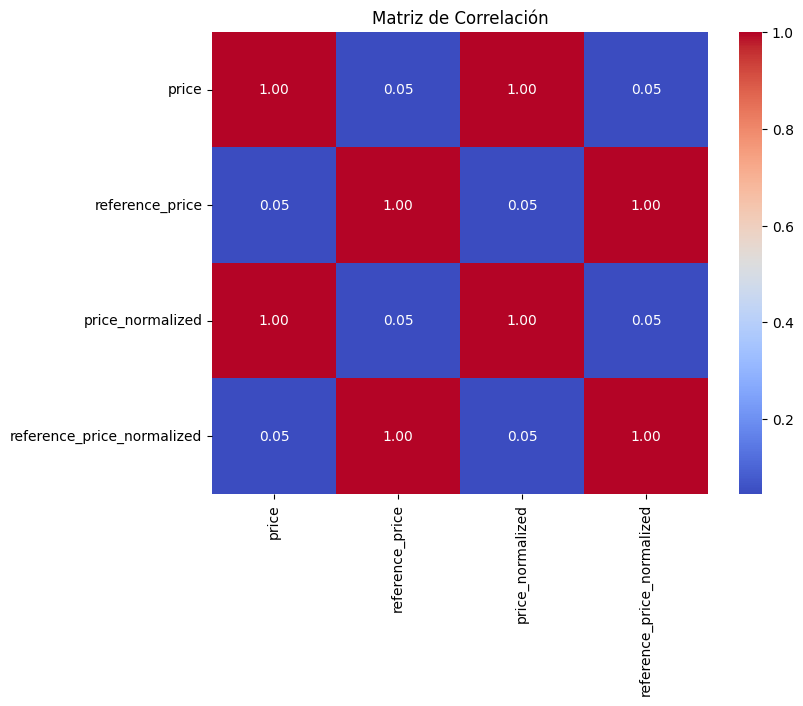

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de correlación
correlation_matrix = dataset[['price', 'reference_price', 'price_normalized', 'reference_price_normalized']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

## Conclusion y resumen final del preprocesado

1. Revisión y limpieza inicial:

    Comprobamos que no hay valores nulos en ninguna columna del dataset.
    Validamos que los datos de price no contengan valores negativos o inconsistentes.

2. Conversión de tipos de datos:

    Convertimos la columna insert_date al formato datetime para facilitar el análisis temporal.
    Agregamos una columna year_month para agrupar los datos por mes y año.

3. Detección y manejo de outliers:

    Usamos el método del Rango Intercuartil (IQR) para identificar y filtrar outliers en la columna price.
    Esto permitió mejorar la visualización y el análisis sin que los valores extremos distorsionen los resultados.

4. Normalización y estandarización:
    
    Normalizamos las columnas price y reference_price para escalar sus valores entre 0 y 1 (MinMaxScaler).
    Estandarizamos estas mismas columnas para que tengan una media de 0 y desviación estándar de 1 (StandardScaler):
- price_normalized, reference_price_normalized (normalización).
- price_standardized, reference_price_standardized (estandarización).

5. Codificación de variables categóricas:

    Usamos One-Hot Encoding para convertir las columnas categóricas:
- category: Transformada en múltiples columnas binarias, una para cada categoría única.
- reference_unit: Transformada en columnas binarias, una para cada unidad de referencia única.
    Esto permitió transformar datos categóricos en formato numérico, que es compatible con modelos de machine learning.

6. Selección de columnas relevantes:

    Creamos un nuevo dataset con las columnas más útiles para el análisis y modelado:
- Las variables escaladas (price_normalized, reference_price_normalized).
- Las columnas categóricas codificadas (category_encoded, unit_encoded).
- Las columnas temporales (insert_date, year_month).
